# Import libraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib as plt
import numpy as np
import pandas as pd
from PIL import Image
import platform
import seaborn as sns

## Check libraries version

In [ ]:
print(f"""
      \nPython version: {platform.python_version()}
      \nTensorFlow version: {tf.__version__}
      \nKeras version: {tf.keras.__version__}
      \nMatplotlib: {plt.__version__}
      \nPILLOW: {Image.__version__}
      \nSeaborn: {sns.__version__}
      \nNumpy: {np.__version__}
      \nPandas: {pd.__version__}
      """
)


      
Python version: 3.8.10
      
TensorFlow version: 2.9.2
      
Keras version: 2.9.0
      
Matplotlib: 3.2.2
      
PILLOW: 7.1.2
      
Seaborn: 0.11.2
      
Numpy: 1.21.6
      
Pandas: 1.3.5
      


# Load dataset

In [ ]:
# view all available datasets.
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [ ]:
# confirm selected dataset.
DATASET_NAME = 'malaria'

dataset_train_raw, dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=tfds.Split.TRAIN,
)

# Split and shuffle the dataset

In [ ]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
# call and return the splits.
train_dataset, validation_dataset, test_dataset = get_dataset_partitions_tf(dataset_train_raw, dataset_info.splits['train'].num_examples)

In [ ]:
print(f"""\
      Raw train dataset: {train_dataset}, '\n'
      Raw train dataset size: {len(list(train_dataset))}, '\n'
      Raw validation dataset: {validation_dataset}
      Raw validation dataset size: {len(list(validation_dataset))}, '\n'
      Raw test dataset: {test_dataset}
      Raw test dataset size: {len(list(test_dataset))}, '\n'
      """
      )

      Raw train dataset: <TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>, '
'
      Raw train dataset size: 16534, '
'
      Raw validation dataset: <TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
      Raw validation dataset size: 5511, '
'
      Raw test dataset: <SkipDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
      Raw test dataset size: 5513, '
'
      


**Discussion Stage**\
Here we can show the description of the dataset (Train, Validation, Test) splits.
Also, from here we can notice that the dataset info didn't have any info about the shapes of images, and the names on it,

# Exploring the dataset

In [ ]:
# check dataset info.
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_path='tmp/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},
      author={

**Discussion Stage**\
Here we could see some info about the data.

In [ ]:
# extract the number of labels.
No_OF_LABEL_CLASSES = dataset_info.features['label'].num_classes
# extract the number of training examples.
No_OF_TRAIN_EXAMPLES = len(list(train_dataset))
# extract the number of validation examples.
No_OF_VALIDATION_EXAMPLES = len(list(validation_dataset))
# extract the number of test examples.
No_OF_TEST_EXAMPLES = len(list(test_dataset))

print(f"""
        Number of TRAIN examples: {No_OF_TRAIN_EXAMPLES}\n
        Number of VALIDATION examples: {No_OF_VALIDATION_EXAMPLES}\n
        Number of TEST classes: {No_OF_TEST_EXAMPLES}\n
        Number of Label classes: {No_OF_LABEL_CLASSES}\n
        """
        )


        Number of TRAIN examples: 16534

        Number of VALIDATION examples: 5511

        Number of TEST classes: 5513

        Number of Label classes: 2

        


**Discussion Stage**\
The output of previous cell provides basic information about the dataset.

In [ ]:
# extract image size
INPUT_IMG_SIZE = dataset_info.features['image'].shape[0]
INPUT_IMG_SHAPE = dataset_info.features['image'].shape
print(f"""
      Input image size: {INPUT_IMG_SIZE}\n
      Input image shape:: {INPUT_IMG_SHAPE}
      """
      )


      Input image size: None

      Input image shape:: (None, None, 3)
      


**Discussion Stage**\
Provides some info about the images in the dataset, but because of there is no information about it in the dataset info, I will use an alternative method.

In [ ]:
# convert the label ID to label string.
get_label_name = dataset_info.features['label'].int2str

In [ ]:
# print labels names
[get_label_name(i_name) for i_name in range(No_OF_LABEL_CLASSES)]

['parasitized', 'uninfected']

In [ ]:
def preview_dataset(dataset):
  '''
  This function preview dataset images.
  Args: tensor dataset images.
  Returns: preview tensor images.
  '''
  plt.pyplot.figure(figsize=(12, 12))
  plot_index = 0
  for features in dataset.take(12):
      (image, label) = features
      plot_index += 1
      plt.pyplot.subplot(3, 4, plot_index)
      # plt.axis('Off')
      label = get_label_name(label.numpy())
      plt.pyplot.title('Label: %s' % label)
      plt.pyplot.imshow(image.numpy())

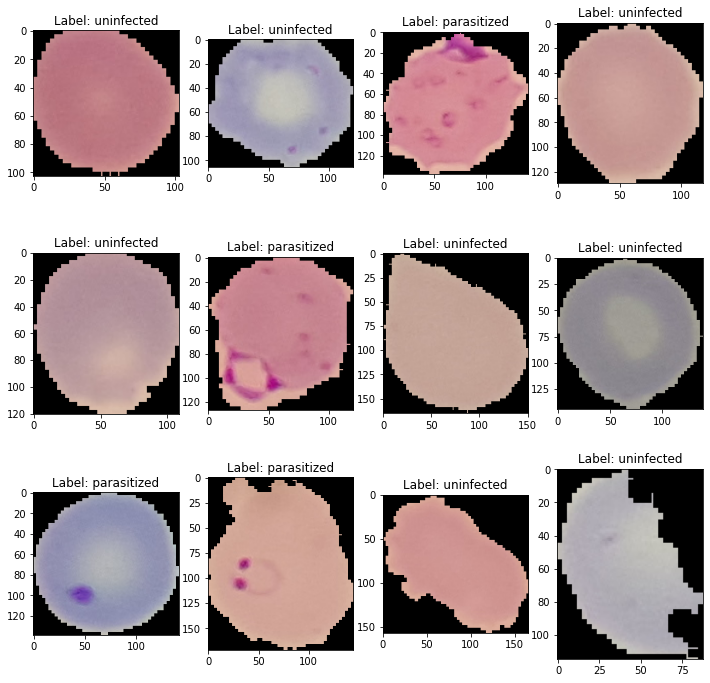

In [ ]:
# explore raw training dataset images.
preview_dataset(dataset_train_raw)

In [ ]:
# explore what values are used to represent the image. 
(first_image, first_lable) = list(dataset_train_raw.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 1 

Image shape: (103, 103, 3) 

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
# check the balance of the target classes.
numpy_labels = dict()
for _, labels in dataset_train_raw.take(-1):  # take all elements of dataset
  if str(labels.numpy()) not in numpy_labels.keys():
    numpy_labels[str(labels.numpy())] = 1
  else:
    numpy_labels[str(labels.numpy())] += 1

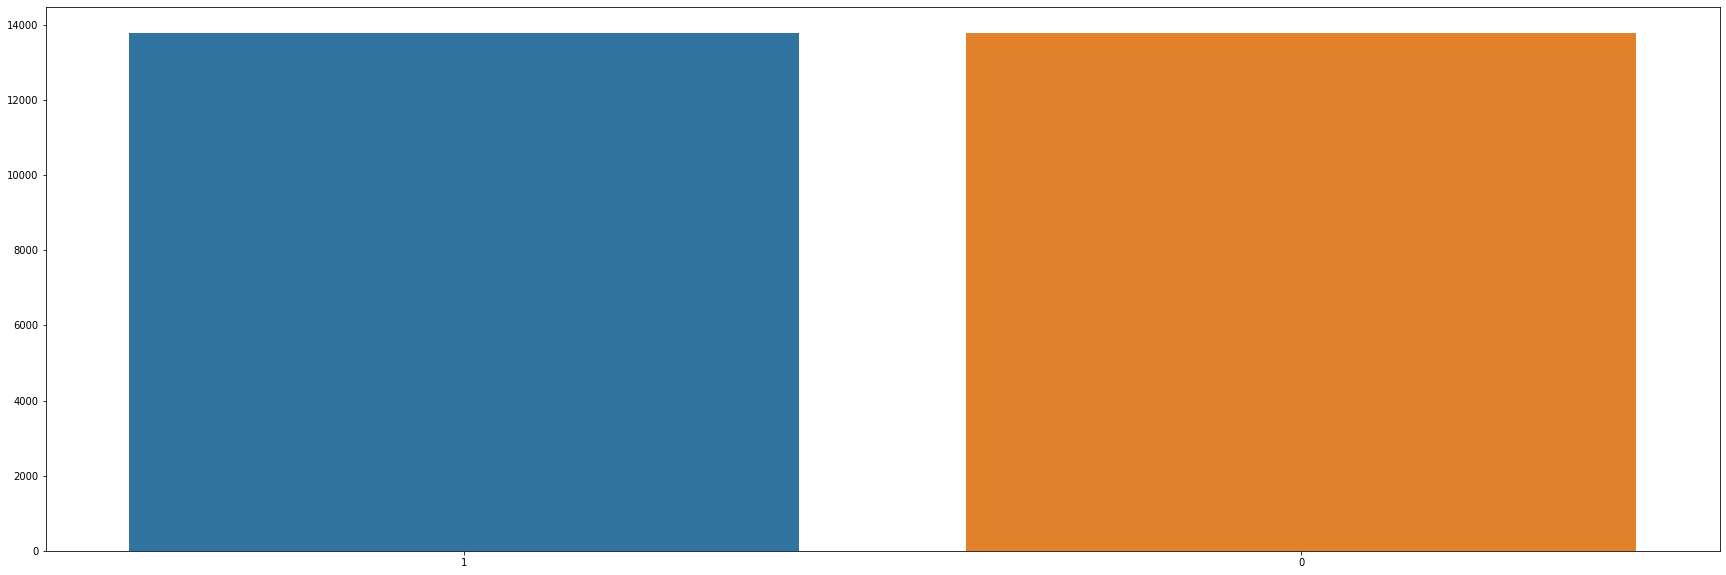

In [ ]:
# check the balance of the target classes.
plt.pyplot.figure(figsize= (30, 10))
sns.barplot(y = list(numpy_labels.values()), x=list(numpy_labels.keys()))

# Pre-processing the dataset

**Important step for the model to process the image in a high performance**\
**NOTE** We can also do it using ImageDataGenerator method.

In [ ]:
def examples_shapes(dataset):
  '''
  This function returns the minimum size of each image in the dataset.
  Args: tensor dataset images.
  Returns: minimum size of the images in the dataset.
  '''
  axis_1 = []
  axis_2 = []
  for features in dataset.take(-1):
      (image, label) = features
      axis_1.append(image.shape[0])
      axis_2.append(image.shape[1])
  return axis_1, axis_2

In [ ]:
# call the function and return the its sizes
axis_1, axis_2 = examples_shapes(train_dataset)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


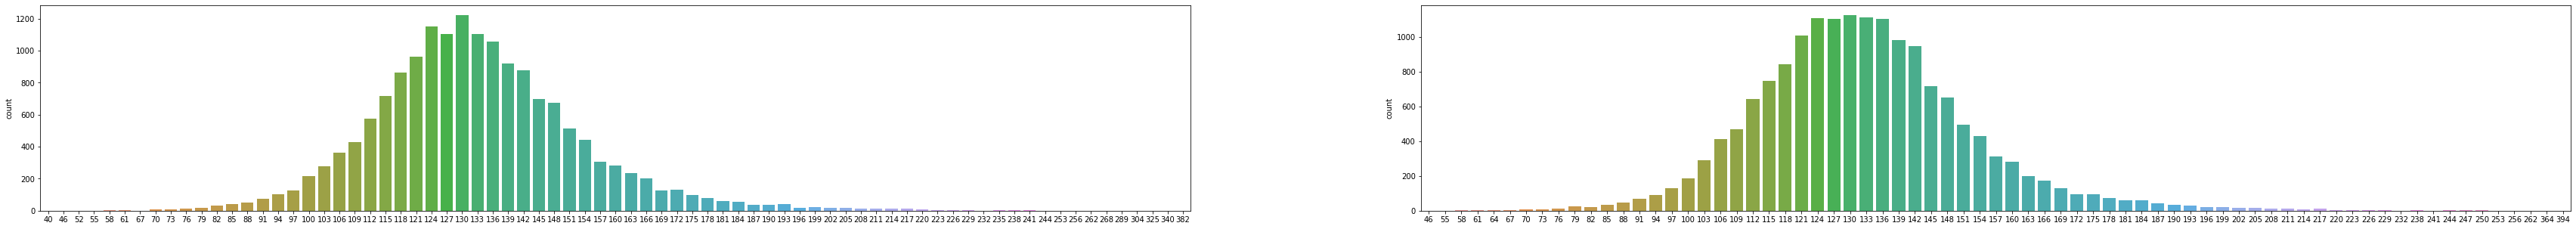

In [ ]:
# check the count of images sizes in the dataset classes .
plt.pyplot.figure(figsize= (60, 5))
plt.pyplot.subplot(1, 2, 1)
sns.countplot(axis_1)
plt.pyplot.subplot(1, 2, 2)
sns.countplot(axis_2)

In [ ]:
# take the average of the images shape.
(FIXED_IMG_SIZE_1, FIXED_IMG_SIZE_2) = int(np.average(axis_1)), int(np.average(axis_2))

In [ ]:
def format_example(image, label, FIXED_IMG_SIZE = (FIXED_IMG_SIZE_1, FIXED_IMG_SIZE_2)):
  '''
  This function changes the format of each image by fixed data.
  Args: tensor image we want to change its format, with the label, and FIXED_IMG_SIZE.
  Returns: tensor image with a specific format.
  '''
  # make image color values to be float.
  image = tf.cast(image, tf.float32)
  # make image color values to be in [0-1] range.
  image = image / 255.
  # make sure that image has a right size by using fixed image size.
  image = tf.image.resize(image, [FIXED_IMG_SIZE_1, FIXED_IMG_SIZE_2])
  return image, label

In [ ]:
# make changes in training set.
train_dataset = train_dataset.map(format_example)
# make changes on validation set.
validation_dataset = validation_dataset.map(format_example)
# make changes on test set.
test_dataset = test_dataset.map(format_example)

In [ ]:
# explore what values are used to represent the image. 
(first_image, first_lable) = list(train_dataset.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 1 

Image shape: (132, 132, 3) 

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


**Discussion Stage**\
Zeros appear here profusely because of the shape of some images in the training set (its less than the Fixed_size I chose).

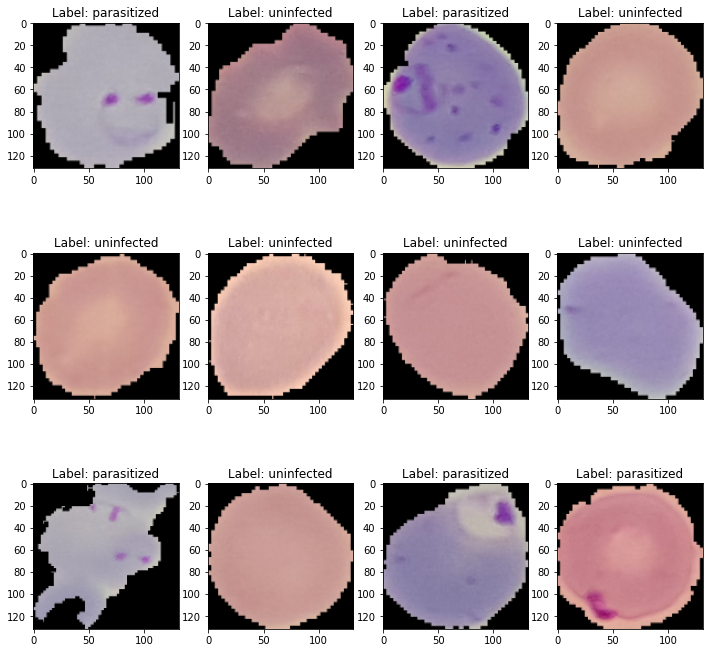

In [ ]:
# explore preprocessed training dataset images.
preview_dataset(train_dataset)

In [ ]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
  '''
  This function flips each image (left_right and up_down) by random seed.
  Args: tensor image we want to flip.
  Returns: tensor image with a random (left and right) flip.
  '''
  # flip images by random seed.
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  return image

In [ ]:
def augment_color(image: tf.Tensor) -> tf.Tensor:
  '''
  This function changes the color of each image (hue, saturation, brightness, contrast) by random seed
  Args: tensor image we want to change its color
  Returns: tensor image with a random (hue, saturation, brightness, contrast) changes(effects)
  '''
  image = tf.image.random_hue(image, max_delta=0.08)
  image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
  image = tf.image.random_brightness(image, 0.05)
  image = tf.image.random_contrast(image, lower=0.8, upper=1)
  # make sure the range of values sites between [0-1] range.
  image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
  return image

In [ ]:
def augment_inversion(image: tf.Tensor) -> tf.Tensor:
  '''
  This function inverse the image.
  Args: tensor image we want to inverse.
  Returns: tensor image with an augment_inversion image.
  '''
  random = tf.random.uniform(shape=[], minval=0, maxval=1)
  if random > 0.5:
      image = tf.math.multiply(image, -1)
      image = tf.math.add(image, 1)
  return image

In [ ]:
def augment_zoom(image: tf.Tensor, min_zoom=0.7, max_zoom=0.9) -> tf.Tensor:
  '''
  This function process zooms to image.
  Args: tensor image we want to zoom.
  Returns: tensor image with a zooming image.
  '''
  scales = (min_zoom, max_zoom)

  return tf.numpy_function(lambda image: tf.keras.preprocessing.image.random_zoom(
    image, scales, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest',
), [image], tf.float32)

In [ ]:
def augment_data(image, label):
  '''
  This function applies data augmentation.
  Args: tensor image.
  Returns: tensor image with an augmented data.
  '''
  image = augment_flip(image)
  image = augment_color(image)
  image = augment_zoom(image)
  image = augment_inversion(image)
  return image, label

In [ ]:
# applying data augmentation to the training set
train_dataset_augmented = train_dataset.map(augment_data)

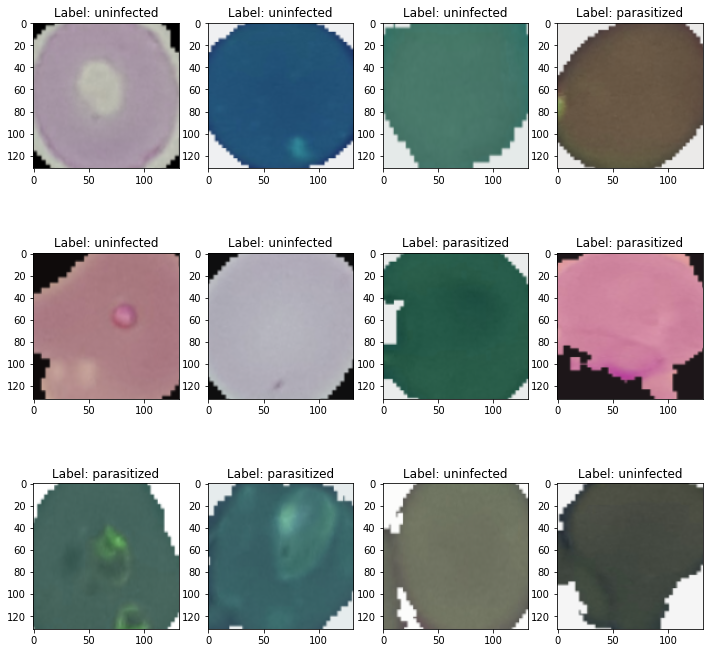

In [ ]:
# explore the augmented training dataset.
preview_dataset(train_dataset_augmented)

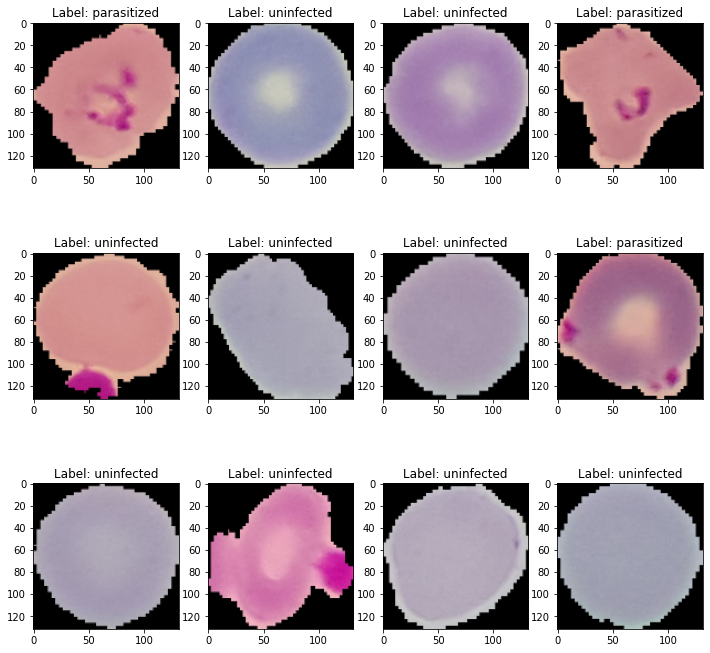

In [ ]:
# explore the validation dataset.
preview_dataset(validation_dataset)

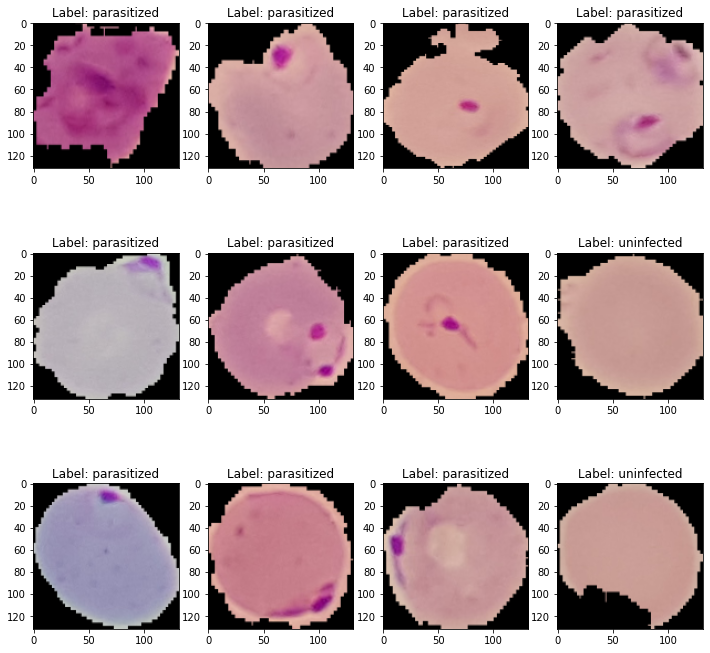

In [ ]:
# explore the testing dataset.
preview_dataset(test_dataset)

# Data shuffling and batching

In [ ]:
BATCH_SIZE = 64

trained_data = train_dataset_augmented.shuffle(
    buffer_size= No_OF_TRAIN_EXAMPLES
)

trained_data = trained_data.batch(
    batch_size=BATCH_SIZE
)

# prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
trained_data = trained_data.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)


val_dataset = validation_dataset.batch(BATCH_SIZE)

test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
print(f'''
      More info about train data: {trained_data},
      More info about validation data: {validation_dataset},
      More info about test data: {test_dataset}
      ''')


      More info about train data: <PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
      More info about validation data: <MapDataset element_spec=(TensorSpec(shape=(132, 132, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
      More info about test data: <BatchDataset element_spec=(TensorSpec(shape=(None, 132, 132, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
      


Label batch shape: (64,) 

Image batch shape: (64, 132, 132, 3) 

Label batch: [1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0] 

First batch image: [[[0.04632586 0.03902187 0.03776079]
  [0.05376449 0.04483733 0.04316441]
  [0.09102319 0.07389961 0.07014699]
  ...
  [0.04527593 0.03820103 0.03699809]
  [0.04527593 0.03820103 0.03699809]
  [0.04527593 0.03820103 0.03699809]]

 [[0.04898354 0.04109955 0.03969131]
  [0.07525139 0.06163504 0.05877231]
  [0.20682517 0.16425665 0.15404968]
  ...
  [0.04527593 0.03820103 0.03699809]
  [0.04527593 0.03820103 0.03699809]
  [0.04527593 0.03820103 0.03699809]]

 [[0.05335056 0.04450658 0.04285476]
  [0.11055791 0.08918026 0.08434822]
  [0.3973899  0.3121679  0.29132134]
  ...
  [0.04527593 0.03820103 0.03699809]
  [0.04527593 0.03820103 0.03699809]
  [0.04527593 0.03820103 0.03699809]]

 ...

 [[0.7292696  0.53213453 0.50046164]
  [0.73081356 0.5314945  0.5004684 ]

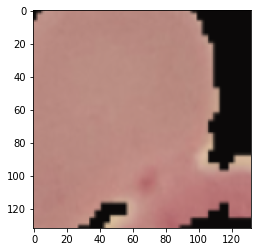

In [ ]:
# debugging the batches using conversion to Numpy arrays.
batches = tfds.as_numpy(trained_data)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')
    
    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.pyplot.imshow(image_batch[batch_item_index])
        plt.pyplot.show()
        # Break to shorten the output.
        break
    # Break to shorten the output.
    break

**Discussion Stage**\
This information will help us to view a specific image of a specific batch.

# Modelling time

**Note**: We will build classical models throughout implementations.

**Compiling Models**

In [ ]:
def model_builder(model, optimizer= tf.keras.optimizers.Adam(learning_rate=0.001)):
  # adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

  model.compile(
      optimizer=optimizer,
      # loss=tf.keras.losses.sparse_categorical_crossentropy,
      loss= tf.keras.losses.BinaryCrossentropy(),
      metrics=['accuracy']
  )
  return model

**Note:** for MultiClassification purpose we have to use tf.keras.losses.sparse_categorical_crossentropy as a loss function.

In [ ]:
steps_per_epoch = No_OF_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = No_OF_VALIDATION_EXAMPLES // BATCH_SIZE

print(f'''
      steps_per_epoch: {steps_per_epoch},
      validation_steps: {validation_steps}
      '''
      )


      steps_per_epoch: 258,
      validation_steps: 86
      


In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=3,
    monitor='val_accuracy'
    # monitor='val_loss'
)

## **LeNet-5**

In [ ]:
LeNet_model = tf.keras.Sequential()

# pre-process step to preview the ability of it using keras preprocessing layers.
LeNet_model.add(tf.keras.layers.RandomRotation(
    (-0.2, 0.3),
    fill_mode='nearest',
    interpolation='bilinear',
    input_shape=(FIXED_IMG_SIZE_1,FIXED_IMG_SIZE_2, 3)
))

# first convolution.
LeNet_model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu'))
LeNet_model.add(tf.keras.layers.AveragePooling2D())

# second convolution.
LeNet_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
LeNet_model.add(tf.keras.layers.AveragePooling2D())

# flatten the results to feed it into the dense layers.
LeNet_model.add(tf.keras.layers.Flatten())

# 120 neurons of dense layer.

LeNet_model.add(tf.keras.layers.Dense(units=120, activation='relu'))
# 84 neurons of dense layer.

LeNet_model.add(tf.keras.layers.Dense(units=84, activation='relu'))

# output layer using a sigmoid activation function.
LeNet_model.add(tf.keras.layers.Dense(units=1, activation = 'sigmoid'))

**Note:** for MultiClassification purpose we have to use units related to the outputs, and softmax activation function.

### Plot Summary

In [ ]:
# extract model summary.
LeNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation (RandomRota  (None, 132, 132, 3)      0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 130, 130, 6)       168       
                                                                 
 average_pooling2d (AverageP  (None, 65, 65, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 31, 31, 16)       0         
 ePooling2D)                                                     
                                                        

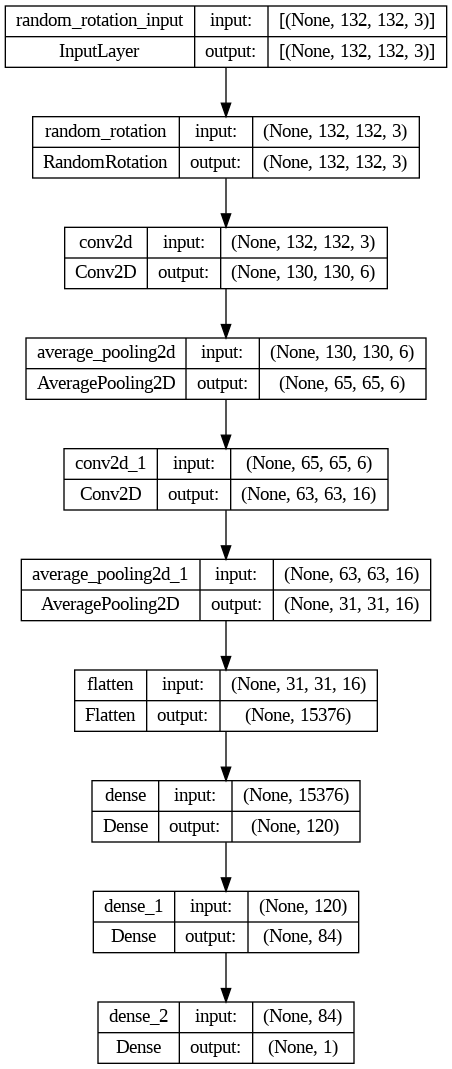

In [ ]:
tf.keras.utils.plot_model(
    LeNet_model,
    show_shapes=True,
    show_layer_names=True,
)

### Training the model

In [ ]:
# build the model.
LeNet_model = model_builder(LeNet_model)

In [ ]:
# fitting the model.
LeNet_history = LeNet_model.fit(
    x=trained_data.repeat(),
    validation_data=val_dataset.repeat(),
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        early_stopping_callback,
    ],
    verbose=1
)

Epoch 1/10
258/258 [==============================] - 91s 69ms/step - loss: 0.6699 - accuracy: 0.5971 - val_loss: 0.6890 - val_accuracy: 0.5149
Epoch 2/10
258/258 [==============================] - 89s 346ms/step - loss: 0.5637 - accuracy: 0.7258 - val_loss: 0.4597 - val_accuracy: 0.8623
Epoch 3/10
258/258 [==============================] - 88s 342ms/step - loss: 0.4297 - accuracy: 0.8107 - val_loss: 0.3272 - val_accuracy: 0.9090
Epoch 4/10
258/258 [==============================] - 89s 346ms/step - loss: 0.3924 - accuracy: 0.8398 - val_loss: 0.4344 - val_accuracy: 0.8269
Epoch 5/10
258/258 [==============================] - 88s 342ms/step - loss: 0.3714 - accuracy: 0.8541 - val_loss: 0.2597 - val_accuracy: 0.9177
Epoch 6/10
258/258 [==============================] - 89s 346ms/step - loss: 0.3441 - accuracy: 0.8696 - val_loss: 0.2686 - val_accuracy: 0.9221
Epoch 7/10
258/258 [==============================] - 88s 342ms/step - loss: 0.3543 - accuracy: 0.8648 - val_loss: 0.4099 - val_acc

In [ ]:
# The evaluate() method - gets the loss statistics
LeNet_model.evaluate(test_dataset)

87/87 [==============================] - 13s 21ms/step - loss: 0.3061 - accuracy: 0.8928


[0.3061143159866333, 0.8927988409996033]

**Discussion Stage**\
There is no overfit using LeNet, but there is some underfit.

## **AlexNet**

In [ ]:
Alex_model = tf.keras.models.Sequential([
    
    # pre-process step to preview the ability of it using keras preprocessing layers.
    tf.keras.layers.RandomRotation((-0.2, 0.3), 
                                   fill_mode='nearest', 
                                   interpolation='bilinear', 
                                   input_shape=(FIXED_IMG_SIZE_1, FIXED_IMG_SIZE_2, 3)
                                   ),
    # First convolution.                               
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    # Second convolution.
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    # Third convolution.
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolution.
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    
    # Fifth convolution.
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),

    # flatten the results to feed it into the dense layers.
    tf.keras.layers.Flatten(),

    # 4096 neuron dense layer.
    tf.keras.layers.Dense(4096, activation='relu'),

    # Dropout layer.
    tf.keras.layers.Dropout(0.5),

    # 4096 neuron dense layer.
    tf.keras.layers.Dense(4096, activation='relu'),
    
    # Dropout layer.
    tf.keras.layers.Dropout(0.5),

    # Output layer.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**Note:** for MultiClassification purpose we have to use units related to the outputs, and softmax activation function.

### Plot Summary

In [ ]:
# extract model summary
Alex_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_1 (RandomRo  (None, 132, 132, 3)      0         
 tation)                                                         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 31, 31, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 256)       614656    
                                                      

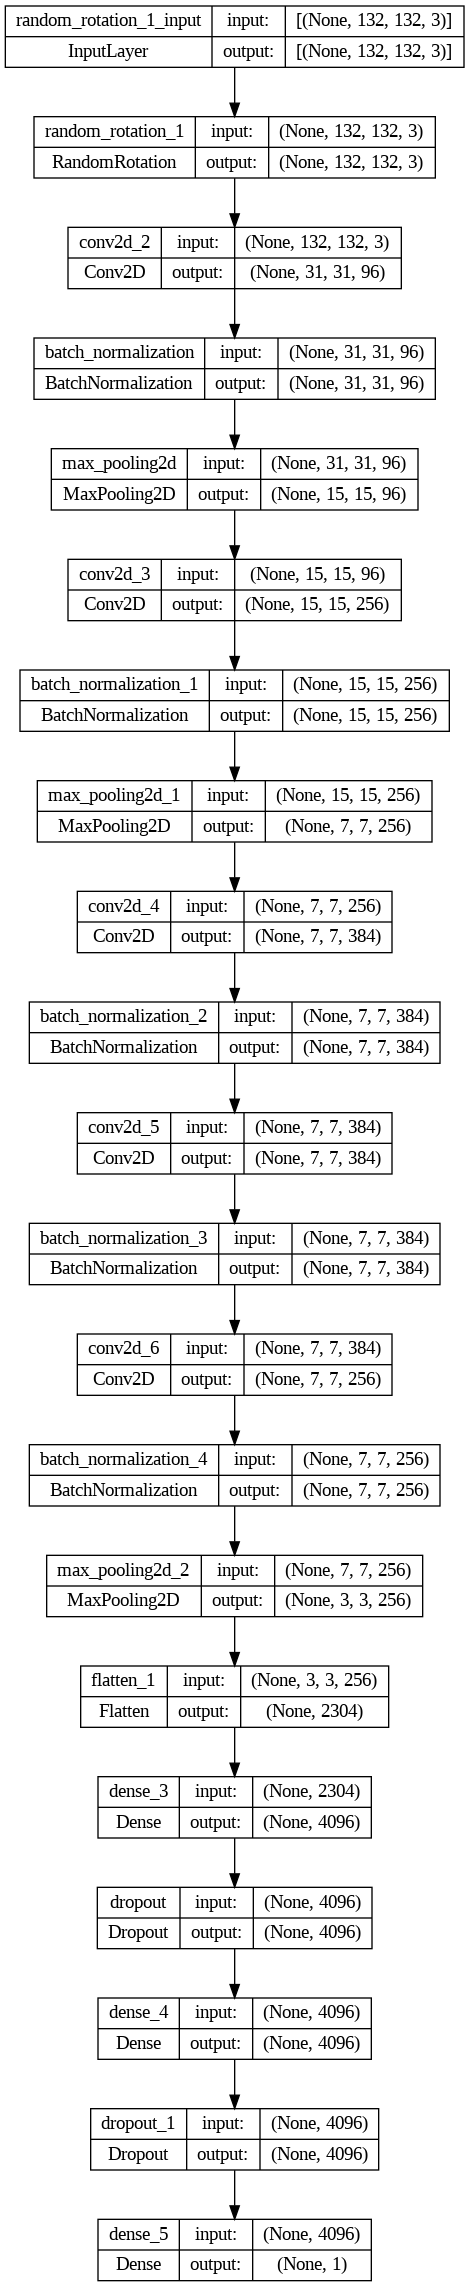

In [ ]:
tf.keras.utils.plot_model(
    Alex_model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
# build the model.
Alex_model = model_builder(Alex_model)

### Training the model

In [ ]:
# fitting the model.
Alex_history = Alex_model.fit(
    x=trained_data.repeat(),
    validation_data=val_dataset.repeat(),
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        early_stopping_callback,
    ],
    verbose=1
)

Epoch 1/10
258/258 [==============================] - 98s 87ms/step - loss: 3.2408 - accuracy: 0.5070 - val_loss: 0.6942 - val_accuracy: 0.5020
Epoch 2/10
258/258 [==============================] - 93s 359ms/step - loss: 0.6953 - accuracy: 0.5172 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 3/10
258/258 [==============================] - 92s 356ms/step - loss: 0.6938 - accuracy: 0.5131 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 4/10
258/258 [==============================] - 92s 359ms/step - loss: 0.6937 - accuracy: 0.5145 - val_loss: 0.6931 - val_accuracy: 0.4989
Epoch 5/10
258/258 [==============================] - 92s 357ms/step - loss: 0.6945 - accuracy: 0.5071 - val_loss: 0.6933 - val_accuracy: 0.4873


### Evaluate the model on test set

In [ ]:
# The evaluate() method - gets the loss statistics
Alex_model.evaluate(test_dataset, batch_size=32)

87/87 [==============================] - 13s 18ms/step - loss: 0.6930 - accuracy: 0.5008


[0.6930460333824158, 0.5008162260055542]

**Discussion Stage**
- Here I noticed that there is no overfit using AlexNet by using these techniques.
- We can improve the accuracy by manipulating the images dataset for better understanding of the image or by decreasing the size of the images to the minimum image size, and also changing optimization algorithm or manipulated the algorithm parameters, or by take mixing of these or etc.

## **VGG-16**

In [ ]:
VGG16_model = tf.keras.Sequential()

# pre-process step to preview the ability of it using keras preprocessing layers.
LeNet_model.add(tf.keras.layers.RandomRotation(
    (-0.2, 0.3),
    fill_mode='nearest',
    interpolation='bilinear',
    input_shape=(FIXED_IMG_SIZE_1,FIXED_IMG_SIZE_2, 3)
))

# First convolution.
VGG16_model.add(tf.keras.layers.Conv2D(input_shape=(FIXED_IMG_SIZE_1, FIXED_IMG_SIZE_2, 3), filters=64,kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Second convolution.
VGG16_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Third convolution.
VGG16_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Fourth convolution.
VGG16_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Fifth convolution.
VGG16_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
VGG16_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Flatten the results to feed it into dense layers.
VGG16_model.add(tf.keras.layers.Flatten())

# 4096 neuron dense layer.
VGG16_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))
VGG16_model.add(tf.keras.layers.Dense(units=4096,activation="relu"))

# Output layer.
VGG16_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

**Note:** for MultiClassification purpose we have to use units related to the outputs, and softmax activation function.

### Plot Summary

In [ ]:
# extract model summary
VGG16_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 132, 132, 64)      1792      
                                                                 
 conv2d_8 (Conv2D)           (None, 132, 132, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 66, 66, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 66, 66, 128)       73856     
                                                                 
 conv2d_10 (Conv2D)          (None, 66, 66, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 33, 33, 128)      0         
 2D)                                                  

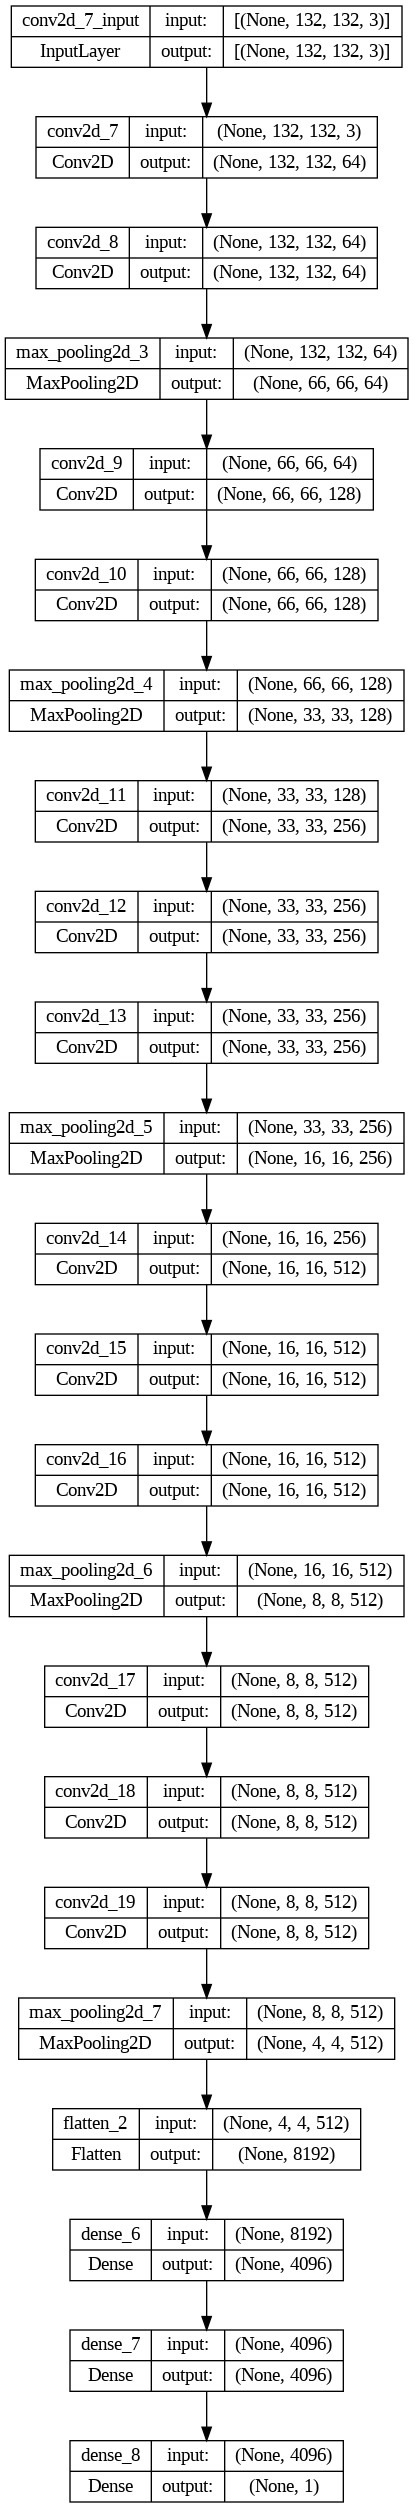

In [ ]:
tf.keras.utils.plot_model(
      VGG16_model,
      show_shapes=True,
      show_layer_names=True,
  )

In [ ]:
# build the model.
VGG16_model = model_builder(VGG16_model)

### Training the model

In [ ]:
# fitting the model.
VGG16_history = VGG16_model.fit(
    x=trained_data.repeat(),
    validation_data=val_dataset.repeat(),
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        early_stopping_callback,
    ],
    verbose=1
)

Epoch 1/10
258/258 [==============================] - 177s 382ms/step - loss: 53.0891 - accuracy: 0.5036 - val_loss: 0.6933 - val_accuracy: 0.4995
Epoch 2/10
258/258 [==============================] - 171s 654ms/step - loss: 0.6933 - accuracy: 0.4969 - val_loss: 0.6933 - val_accuracy: 0.4956
Epoch 3/10
258/258 [==============================] - 168s 651ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6933 - val_accuracy: 0.4964
Epoch 4/10
258/258 [==============================] - 167s 650ms/step - loss: 0.6932 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4949


### Evaluate the model on test set

In [ ]:
# The evaluate() method - gets the loss statistics
VGG16_model.evaluate(test_dataset)

87/87 [==============================] - 22s 117ms/step - loss: 0.6932 - accuracy: 0.4941


[0.6931709051132202, 0.4941048324108124]

**Discussion Stage**
- Here I noticed that there is no overfit using VGG-16 by using these techniques.
- We can improve the accuracy by manipulating the images dataset for better understanding of the image or by decreasing the size of the images to the minimum image size, and also changing optimization algorithm or manipulated the algorithm parameters, or by take mixing of these or etc.

## VGG-19

**Note:** I used Functional API mode.

In [ ]:
# input  
input = tf.keras.layers.Input(shape =(FIXED_IMG_SIZE_1, FIXED_IMG_SIZE_2, 3))

# pre-process step to preview the ability of it using keras preprocessing layers.
VGG19_model = tf.keras.layers.RandomRotation(
    (-0.2, 0.3),
    fill_mode='nearest',
    interpolation='bilinear',
    input_shape=(FIXED_IMG_SIZE_1,FIXED_IMG_SIZE_2, 3)
)(input)

# 1st Conv Block

VGG19_model = tf.keras.layers.Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(VGG19_model)

# 2nd Conv Block

VGG19_model = tf.keras.layers.Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(VGG19_model)

# 3rd Conv block  
VGG19_model = tf.keras.layers.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(VGG19_model) 
VGG19_model = tf.keras.layers.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(VGG19_model) 
VGG19_model = tf.keras.layers.Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(VGG19_model) 
VGG19_model = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(VGG19_model)

# 4th Conv block

VGG19_model = tf.keras.layers.Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(VGG19_model)

# 5th Conv block

VGG19_model = tf.keras.layers.Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(VGG19_model)
VGG19_model = tf.keras.layers.MaxPool2D(pool_size =2, strides =2, padding ='same')(VGG19_model)

# Fully connected layers  
VGG19_model = tf.keras.layers.Flatten()(VGG19_model)

# 4096 neuron dense layers.
VGG19_model = tf.keras.layers.Dense(units = 4096, activation ='relu')(VGG19_model) 
VGG19_model = tf.keras.layers.Dense(units = 4096, activation ='relu')(VGG19_model)

# Output layer. 
output = tf.keras.layers.Dense(units = 1, activation ='sigmoid')(VGG19_model)

**Note:** for MultiClassification purpose we have to use units related to the outputs, and softmax activation function.

In [ ]:
# creating the model

VGG19_model = tf.keras.Model(inputs=input, outputs =output)

### Plot Summary

In [ ]:
# extract model summary
VGG19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 132, 132, 3)]     0         
                                                                 
 random_rotation_3 (RandomRo  (None, 132, 132, 3)      0         
 tation)                                                         
                                                                 
 conv2d_20 (Conv2D)          (None, 132, 132, 64)      1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 132, 132, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 66, 66, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 66, 66, 128)       73856 

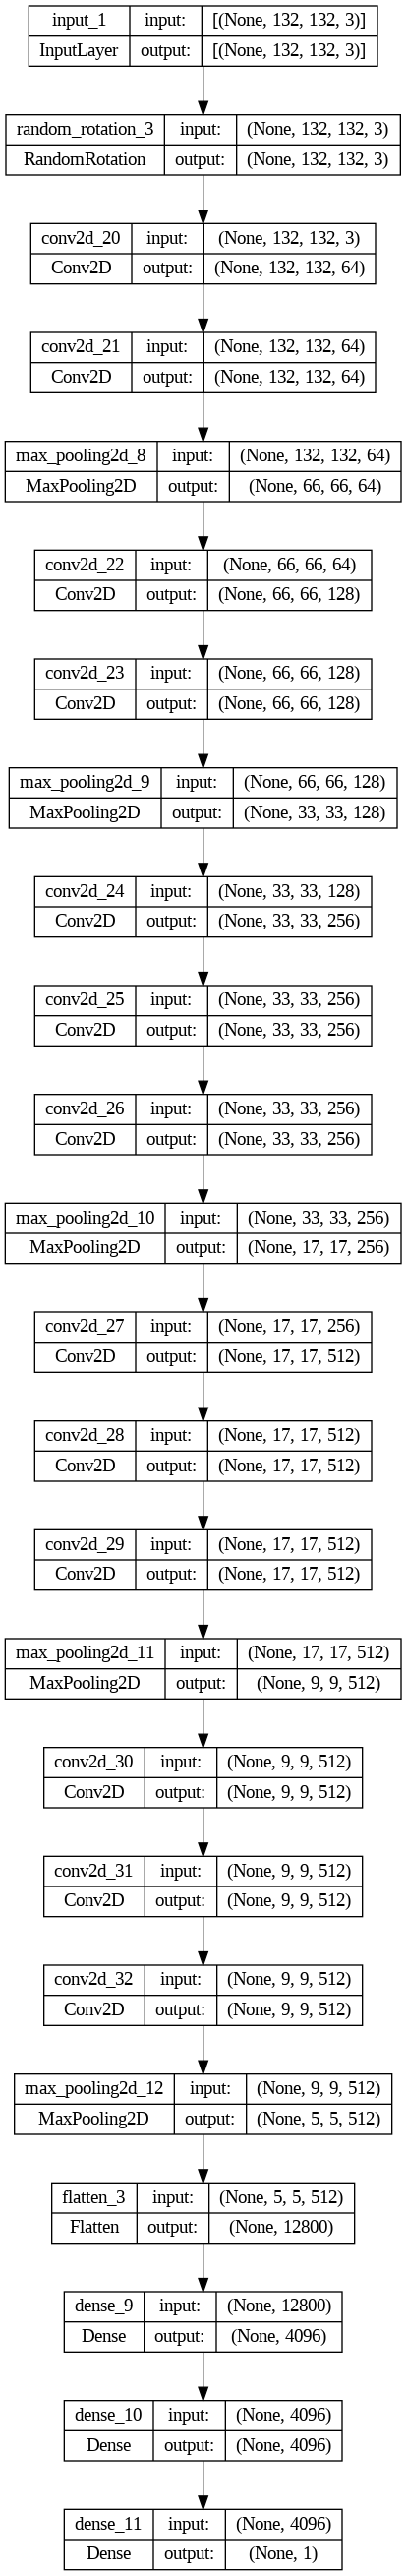

In [ ]:
tf.keras.utils.plot_model(
      VGG19_model,
      show_shapes=True,
      show_layer_names=True,
  )

In [ ]:
# build the model.
VGG19_model = model_builder(VGG19_model)

### Training the model

In [ ]:
# fitting the model.
VGG19_history = VGG19_model.fit(
    x=trained_data.repeat(),
    validation_data=val_dataset.repeat(),
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        early_stopping_callback,
    ],
    verbose=1
)

Epoch 1/10
258/258 [==============================] - 182s 430ms/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 2/10
258/258 [==============================] - 181s 702ms/step - loss: 0.6933 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 3/10
258/258 [==============================] - 181s 702ms/step - loss: 0.6931 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 4/10
258/258 [==============================] - 181s 701ms/step - loss: 0.6934 - accuracy: 0.4912 - val_loss: 0.6933 - val_accuracy: 0.4836


### Evaluate the model on test set

In [ ]:
# The evaluate() method - gets the loss statistics
VGG19_model.evaluate(test_dataset, batch_size=32)

87/87 [==============================] - 22s 124ms/step - loss: 0.6931 - accuracy: 0.5014


[0.6931471824645996, 0.5013604164123535]

**Discussion Stage**
- Here I noticed that there is no overfit using VGG-19 by using these techniques.
- We can improve the accuracy by manipulating the images dataset for better understanding of the image or by decreasing the size of the images to the minimum image size, and also changing optimization algorithm or manipulated the algorithm parameters, or by take mixing of these or etc.

## Visualize the results

In [ ]:
classic_models = [LeNet_history, Alex_history, VGG16_history, VGG19_history]
classic_models_str = ['LeNet', 'Alex', 'VGG16', 'VGG19']

In [ ]:
def results_preview(models_history, model_name):
  '''
  This function plots the accuracy and loss graph of the model.
  Args: models_history as tensor that contains the history of training models, and model_name as str type that contains the names of used models.
  Returns: Visualize the history of models.
  '''
  plt.pyplot.figure(figsize=(14, 4))
  plt.pyplot.subplot(1, 2, 1)
  # get training and validation accuracy
  models_history_str = str(models_history)
  train_acc = models_history.history["accuracy"]
  val_acc = models_history.history["val_accuracy"]
  # get the number of epochs
  n_epoch = range(len(train_acc))
  # plot the graphs
  plt.pyplot.plot(n_epoch, train_acc, color= "r", label = "Training accuracy")
  plt.pyplot.plot(n_epoch, val_acc, color= "b", label = "Validation accuracy")
  plt.pyplot.title(f"{model_name} Accuracy Graph")
  ########################################################################
  plt.pyplot.subplot(1, 2, 2)
  # get training and validation loss
  train_loss = models_history.history["loss"]
  val_loss = models_history.history["val_loss"]
  # plot the graphs
  plt.pyplot.plot(n_epoch, train_loss, color= "r", label = "Training Loss")
  plt.pyplot.plot(n_epoch, val_loss, color= "b", label = "Validation Loss")
  plt.pyplot.title(f"{model_name} Loss Graph")
  plt.pyplot.legend()
  return plt.pyplot.show()

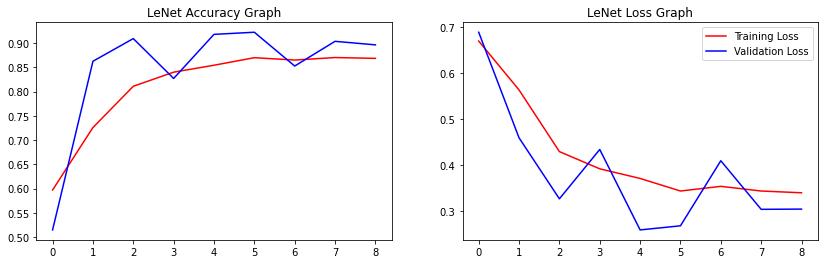

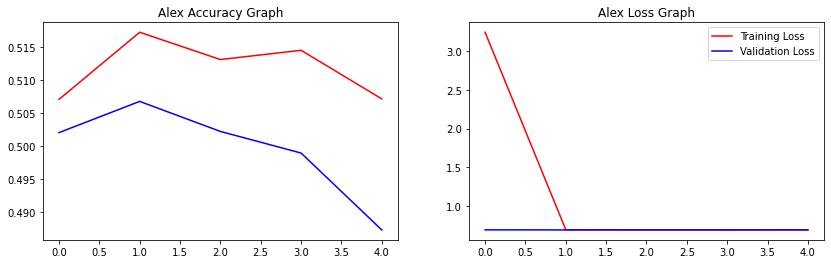

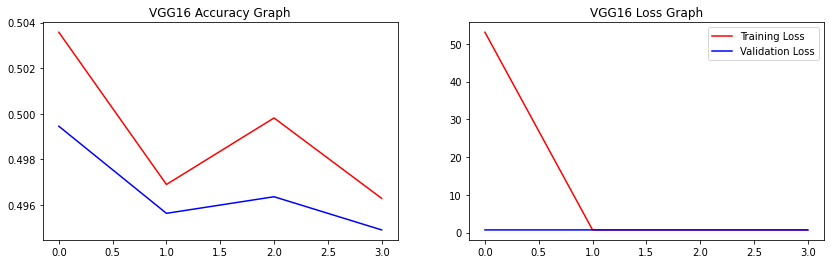

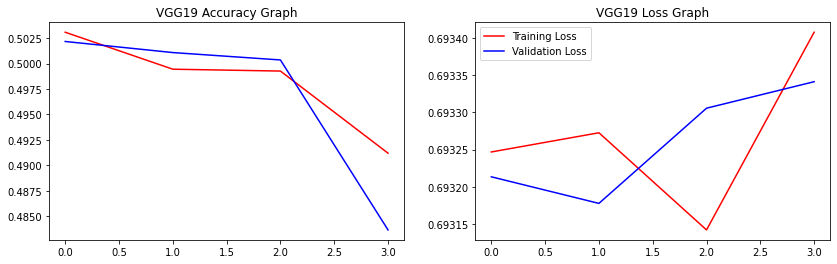

In [ ]:
# visualize the results of evaluate the model on training set
for (model_history, model_name) in zip(classic_models, classic_models_str):
  results_preview(model_history, model_name)